In [2]:
import pystan
import arviz as az
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')
%matplotlib inline

In [6]:
arps = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real d;
    real b; // should contraints be added like greater than zero
    real q;
    real<lower=0> sigma;
}
model {
    sigma ~ normal(0.044, 0.1);
    y ~ normal(q-pow((1+b*d*x),(1/b)),sigma); //I think the proposal distribution should be other than normal. it should be truncated normal etc?
}
"""
sm = pystan.StanModel(model_code=arps)

ValueError: Failed to parse Stan model 'anon_model_8fb4066be5cb656f98bc8a1687f7fe69'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

No matches for: 

  pow(vector, real)

Available argument signatures for pow:

  pow(real, real)

  error in 'unknown file name' at line 15, column 38
  -------------------------------------------------
    13: model {
    14:     sigma ~ normal(0.044, 0.1);
    15:     y ~ normal(q-pow((1+b*d*x),(1/b)),sigma); //I think the proposal distribution should be other than normal. it should be truncated normal etc?
                                             ^
    16: }
  -------------------------------------------------



In [16]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12]) ## log scale
y = np.array([4.30869244, 4.21500271, 4.19451434, 4.08586117, 4.16722869, 4.00906828, 3.99246515, 3.9468942 , 4.02763497, 3.95390459, 3.89608509, 3.91902576])

oil_dat = {'N': np.size(y),
              'x': x,
              'y': y}

In [17]:
fit = sm.sampling(data=oil_dat, iter=10000, chains=4)

In [18]:
print(fit)

Inference for Stan model: anon_model_17d9fc8f6921b3c94c0d7e87fdb84c59.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d     7.3e24  8.1e24 1.8e25  5.9e5  3.3e7 2.7e19 4.7e23 6.9e25      5   1.49
b     4.0e24  3.4e24 6.7e24   4.98   5.89 2.4e21 4.7e24 2.6e25      4   1.78
q     1863.4  1781.8 2939.0  55.92   58.0 204.38 2290.4  1.0e4      3   1.91
sigma   0.06    0.01   0.02   0.04   0.05   0.06   0.08   0.09      2   2.58
lp__   16.38    7.81  11.09   3.34   5.67  13.15  27.73  28.83      2  10.35

Samples were drawn using NUTS at Fri Apr 19 12:27:36 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


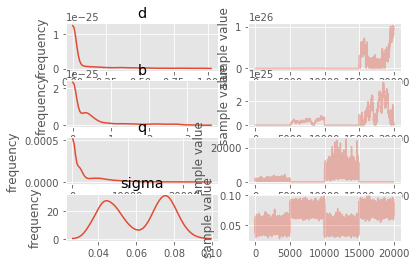

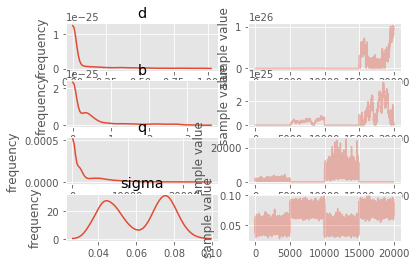

In [19]:
fit.plot()